# HoloViews Example

### Terminology

- kdim: "key dimension" or x-axis
- vdim: "value dimension" or y-axis


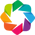

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
import seaborn as sns
hv.extension('bokeh', 'matplotlib')

In [2]:
np.random.seed(9221999)

hv.notebook_extension()
%output holomap='widgets' fig='svg'

In [3]:
%%opts Distribution (hist=False kde_kws=dict(shade=True))
d1 = 25 * np.random.randn(500) + 450
d2 = 45 * np.random.randn(500) + 540
d3 = 55 * np.random.randn(500) + 590
hv.Distribution(d1, label='Blue') *\
hv.Distribution(d2, label='Red') *\
hv.Distribution(d3, label='Yellow')

:Overlay
   .Distribution.Blue   :Distribution   (Value)
   .Distribution.Red    :Distribution   (Value)
   .Distribution.Yellow :Distribution   (Value)

:Layout
   .A.I :Bivariate   [x,y]
   .B.I :Bivariate   [x,y]
   .C.I :Bivariate   [x,y]
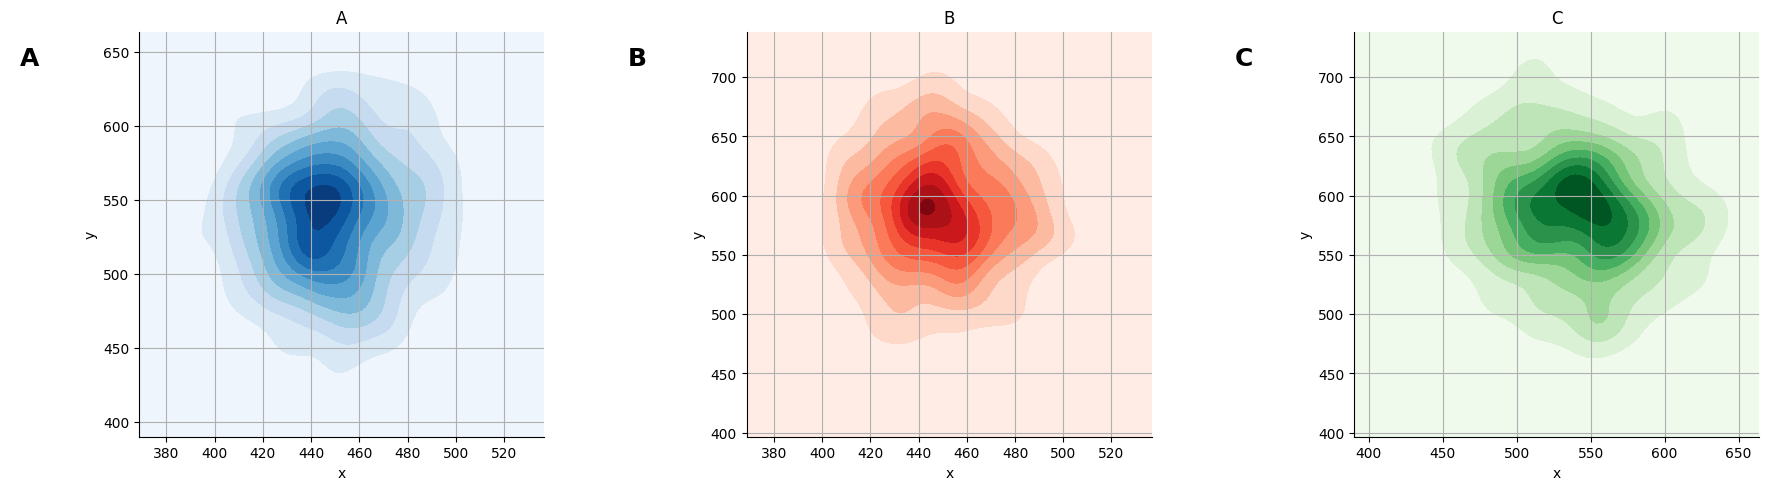

In [7]:
%%opts Bivariate (shade=True) Bivariate.A (cmap='Blues') Bivariate.B (cmap='Reds') Bivariate.C (cmap='Greens')
hv.Bivariate(np.array([d1, d2]).T, group='A') +\
hv.Bivariate(np.array([d1, d3]).T, group='B') +\
hv.Bivariate(np.array([d2, d3]).T, group='C')

:Bivariate   [x,y]
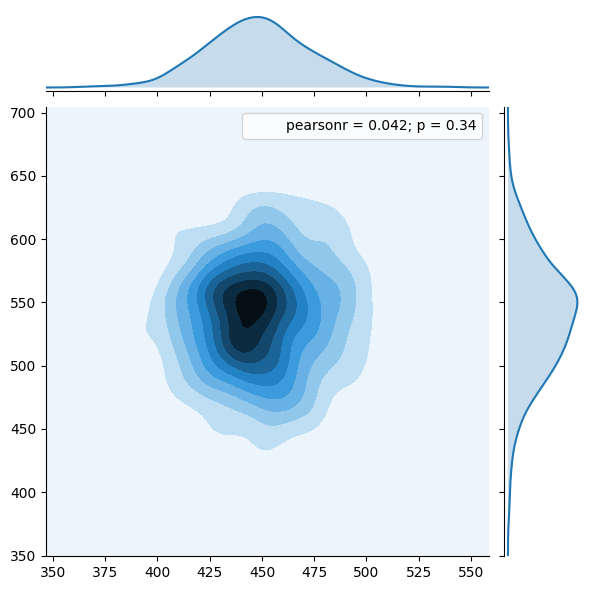

In [8]:
%%opts Bivariate [joint=True] (kind='kde' cmap='Blues')
hv.Bivariate(np.array([d1, d2]).T, group='A')

In [4]:
iris = hv.DFrame(sns.load_dataset("iris"))
tips = hv.DFrame(sns.load_dataset("tips"))
titanic = hv.DFrame(sns.load_dataset("titanic"))

%output fig='png' dpi=100 size=150

:DFrame   [sepal_length,sepal_width,petal_length,petal_width,species]
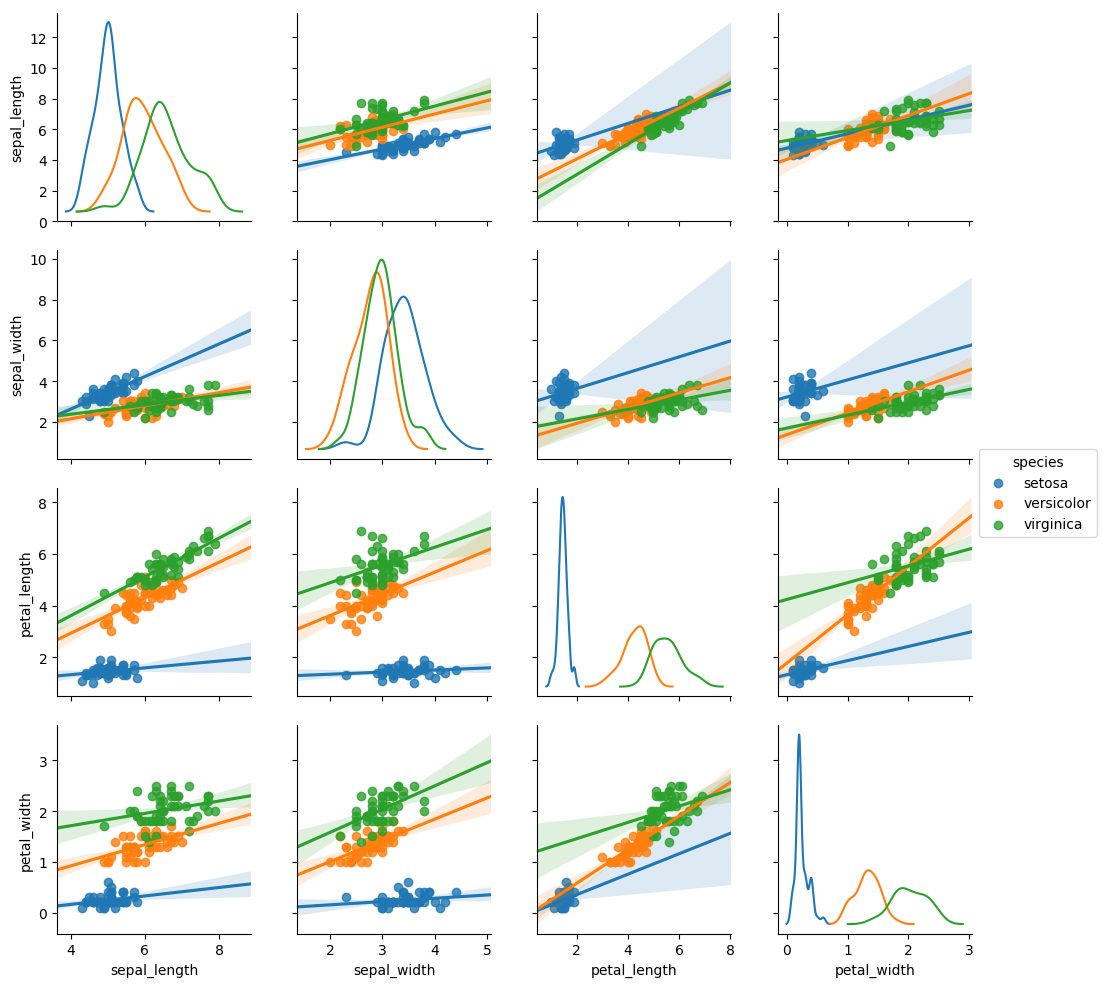

In [25]:
%%opts DFrame (diag_kind='kde', kind='reg', hue='species')
iris.clone(label="Iris Data", plot_type='pairplot')

:Layout
   .DFrame.I  :DFrame   [sepal_length,sepal_width,petal_length,petal_width,species]
   .DFrame.II :DFrame   [sepal_length,sepal_width,petal_length,petal_width,species]
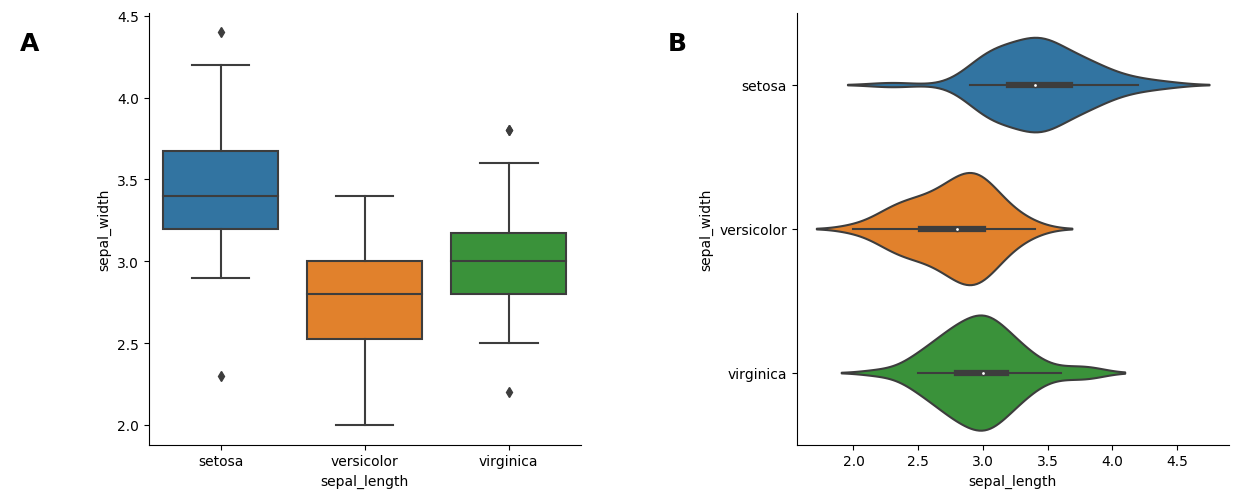

In [20]:
%%opts DFrame [show_grid=False]
iris.clone(x='sepal_width', y='species', plot_type='boxplot') +\
iris.clone(x='species', y='sepal_width', plot_type='violinplot')

In [13]:
diseases = pd.read_csv('data/diseases.csv.gz')

In [14]:
diseases.head()

Year  Week    State  measles  pertussis
0  1928     1  Alabama     3.67        NaN
1  1928     2  Alabama     6.25        NaN
2  1928     3  Alabama     7.95        NaN
3  1928     4  Alabama    12.58        NaN
4  1928     5  Alabama     8.03        NaN

In [15]:
vdims = [('measles', 'Measles Incidence'), ('pertussis', 'Pertussis Incidence')]
ds = hv.Dataset(diseases, kdims=['Year', 'State'], vdims=vdims)

In [16]:
ds = ds.aggregate(function=np.mean)
ds

:Dataset   [Year,State]   (measles,pertussis)

:Layout
   .HoloMap.I  :HoloMap   [State]
      :Curve   [Year]   (measles)
   .HoloMap.II :HoloMap   [State]
      :Curve   [Year]   (pertussis)
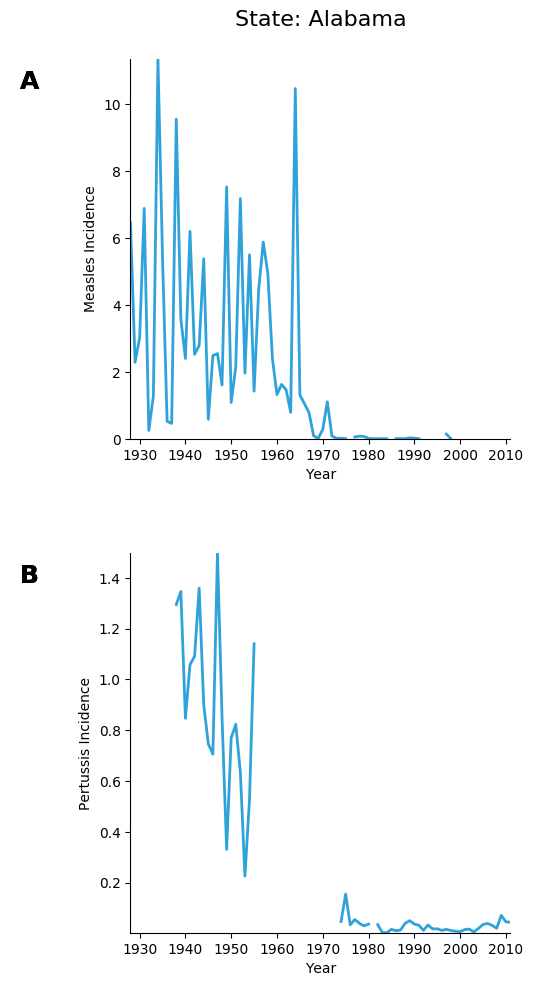
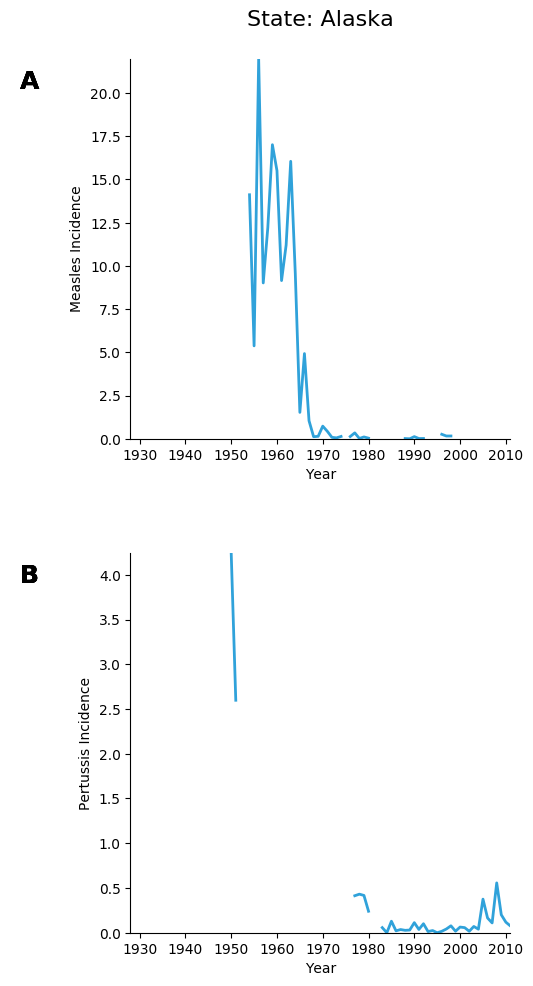
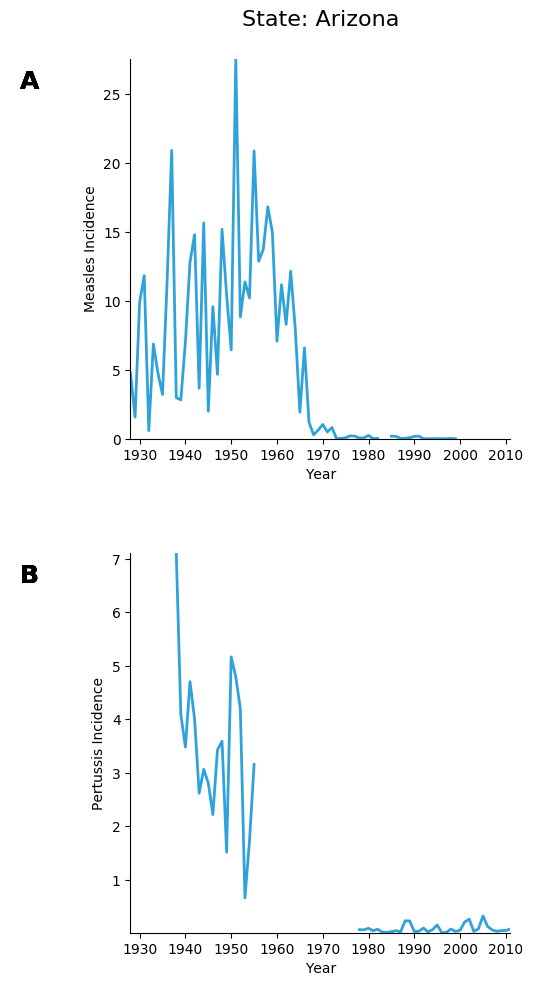
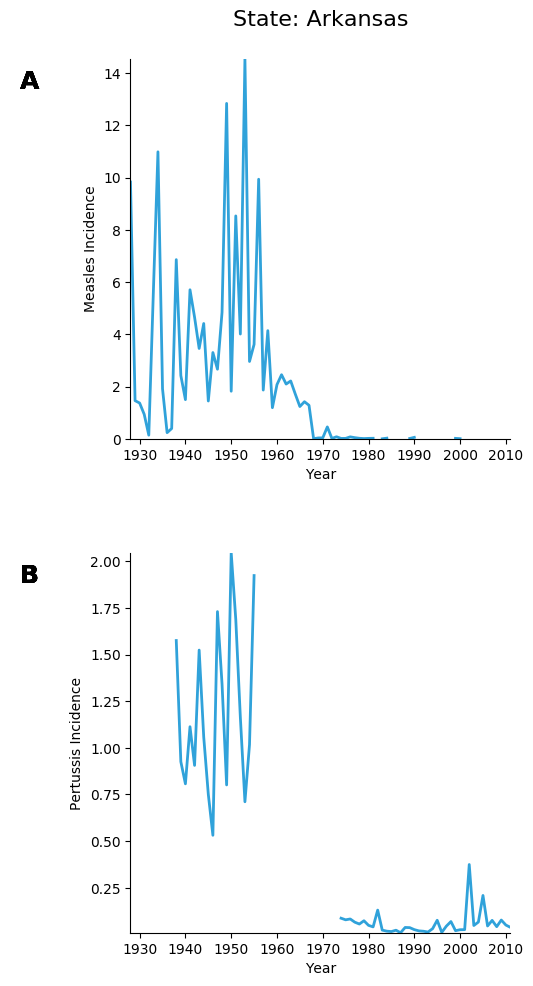
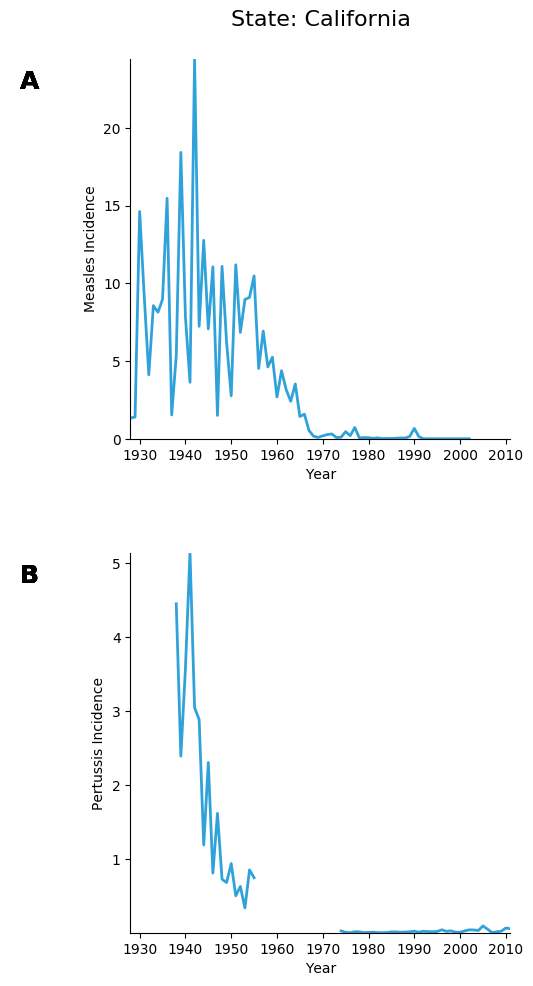
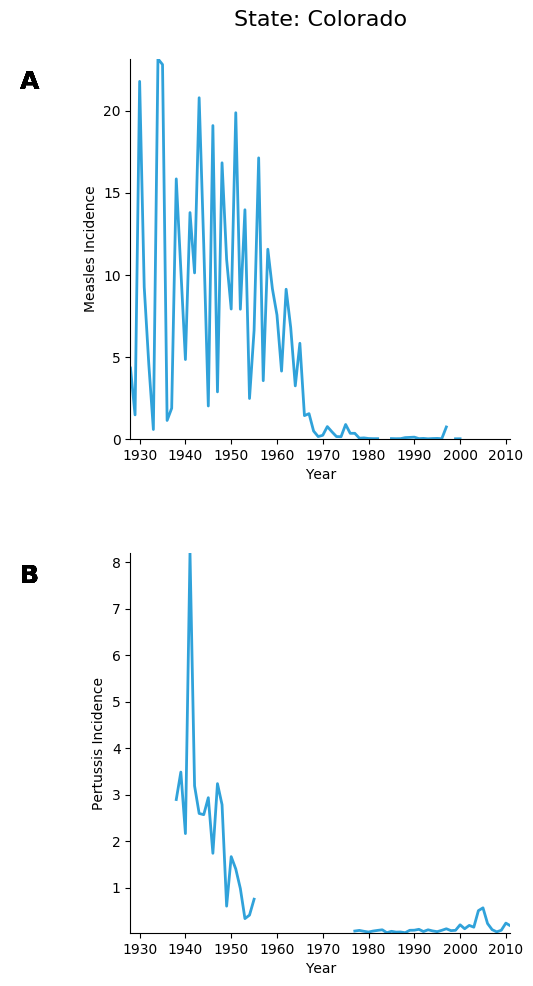
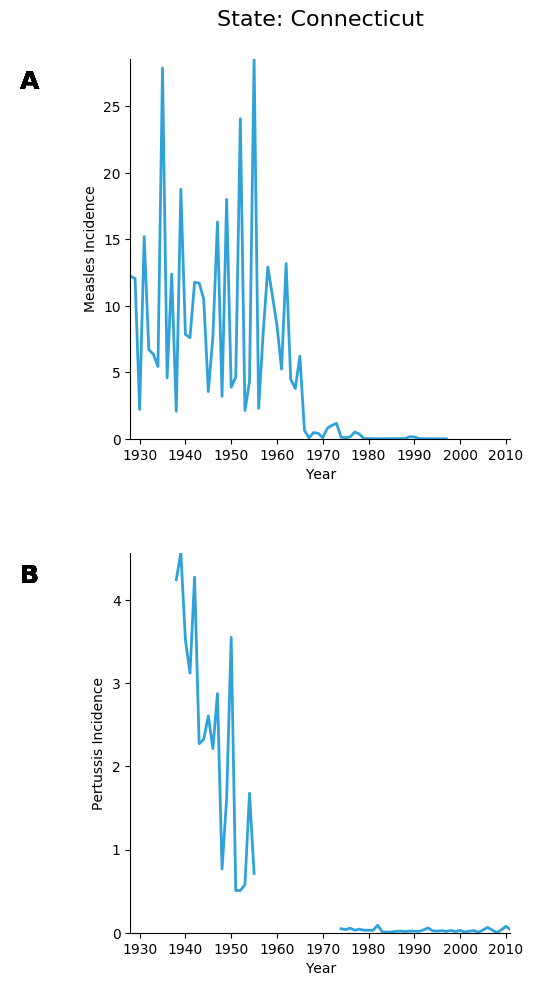
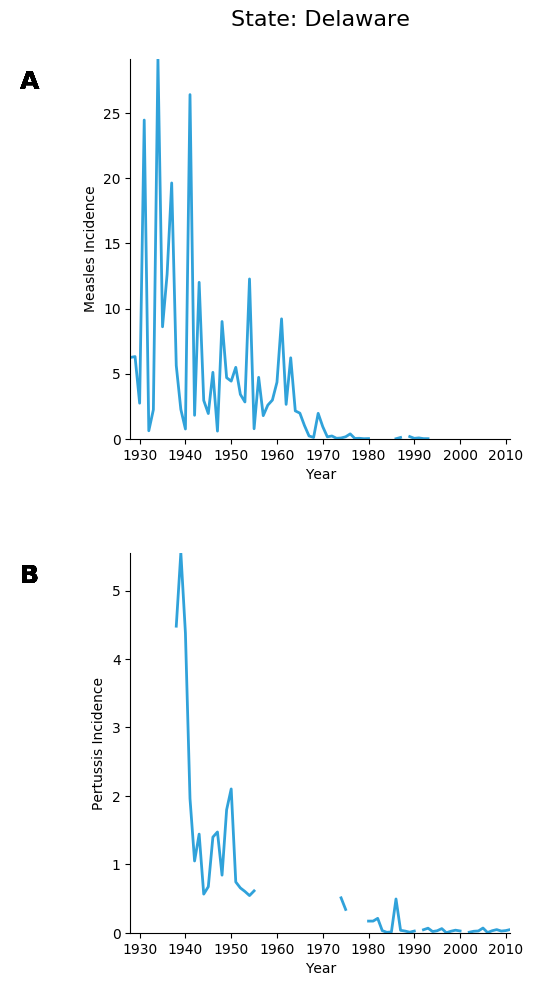
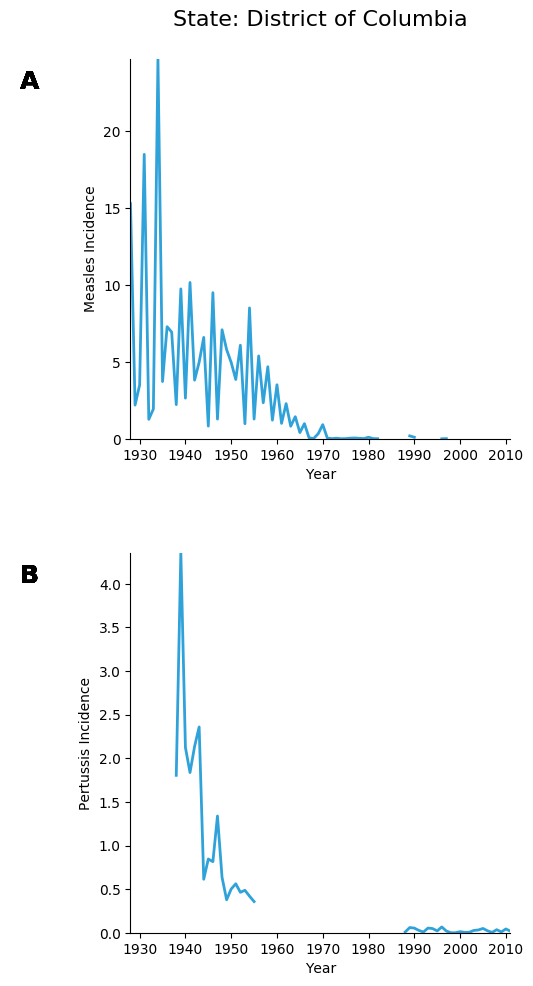
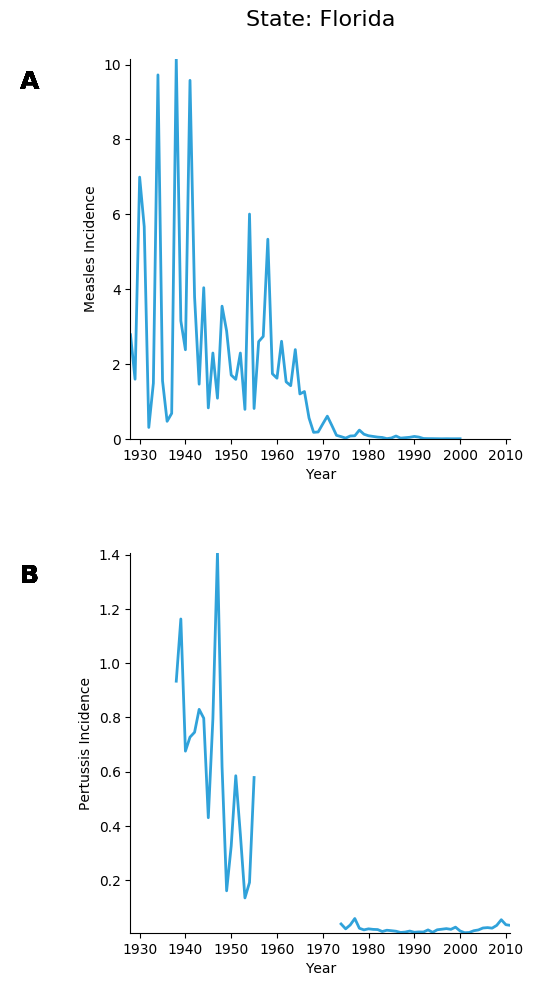
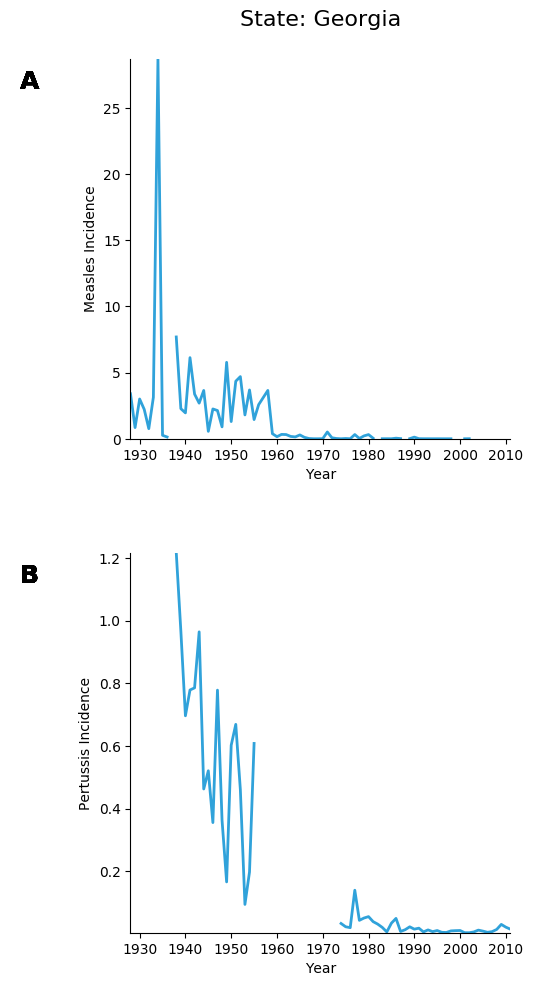
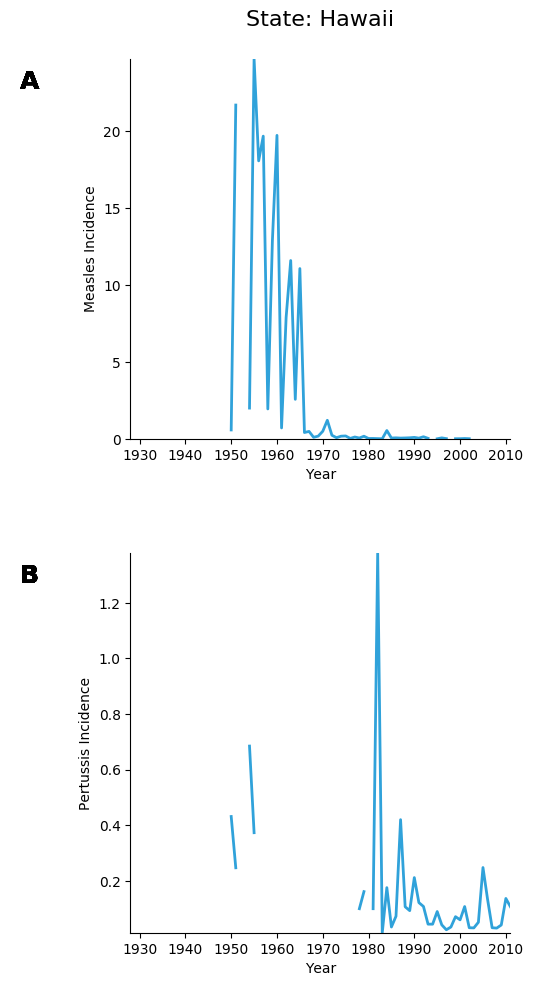
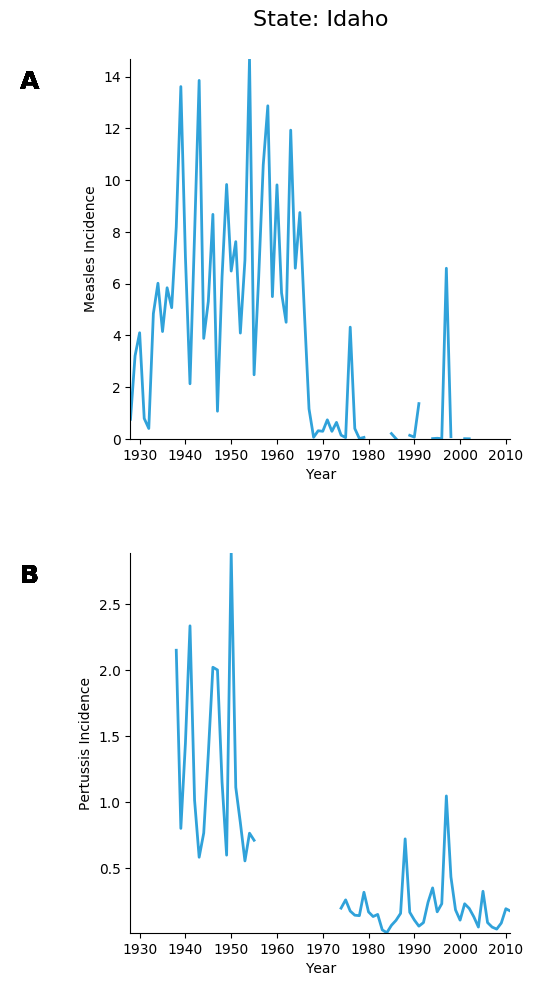
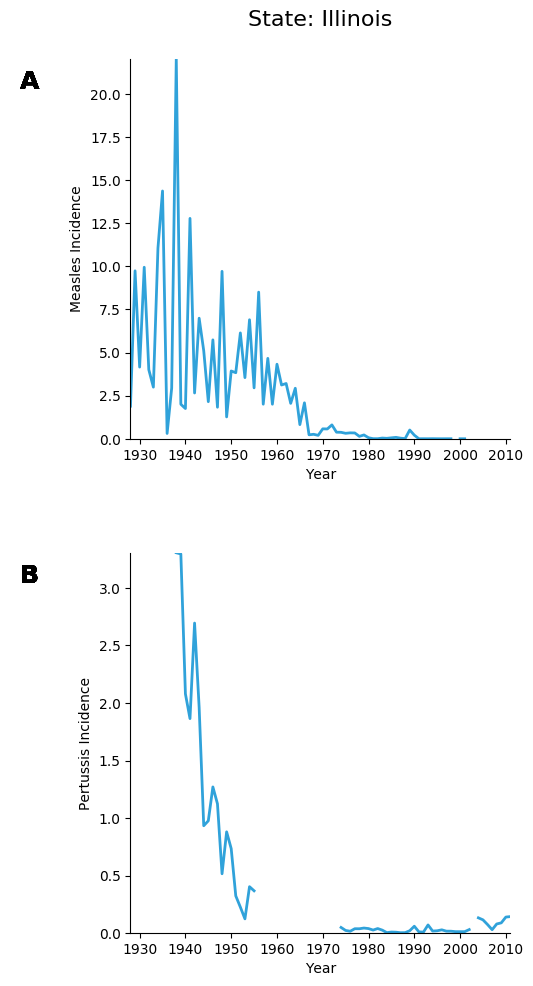
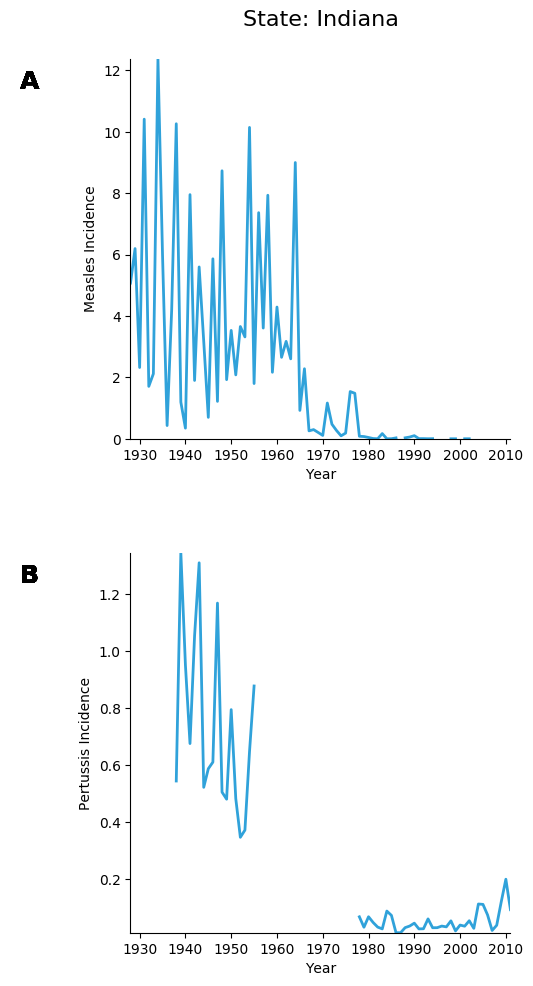
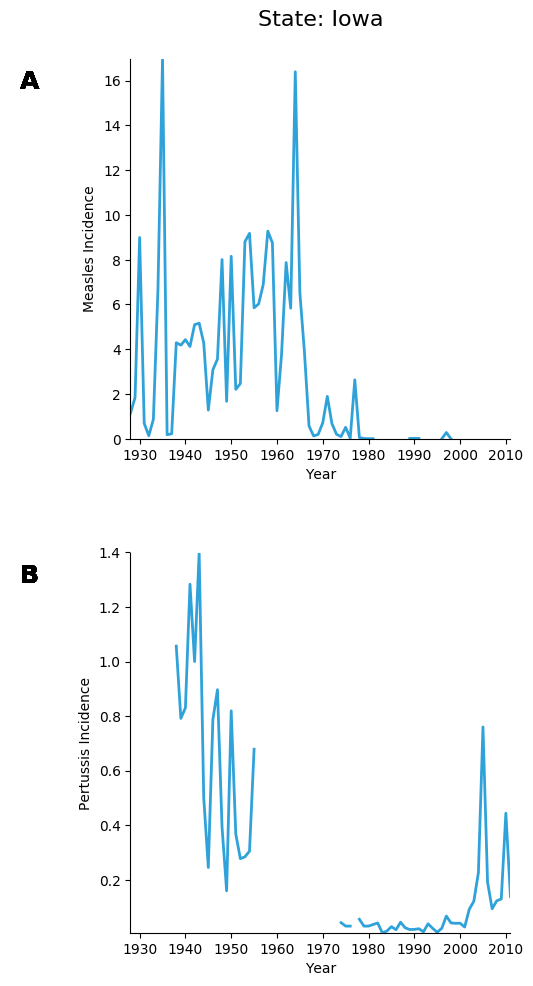
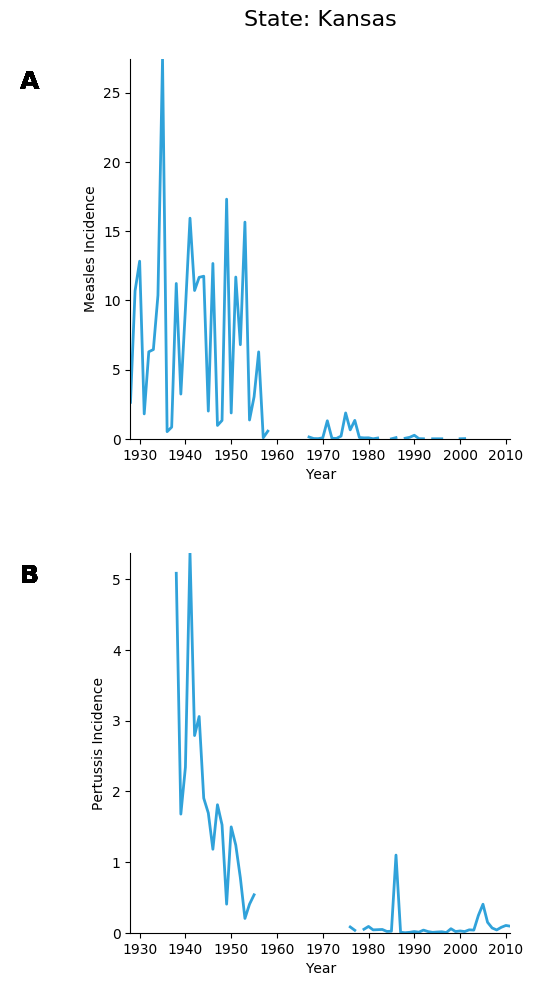
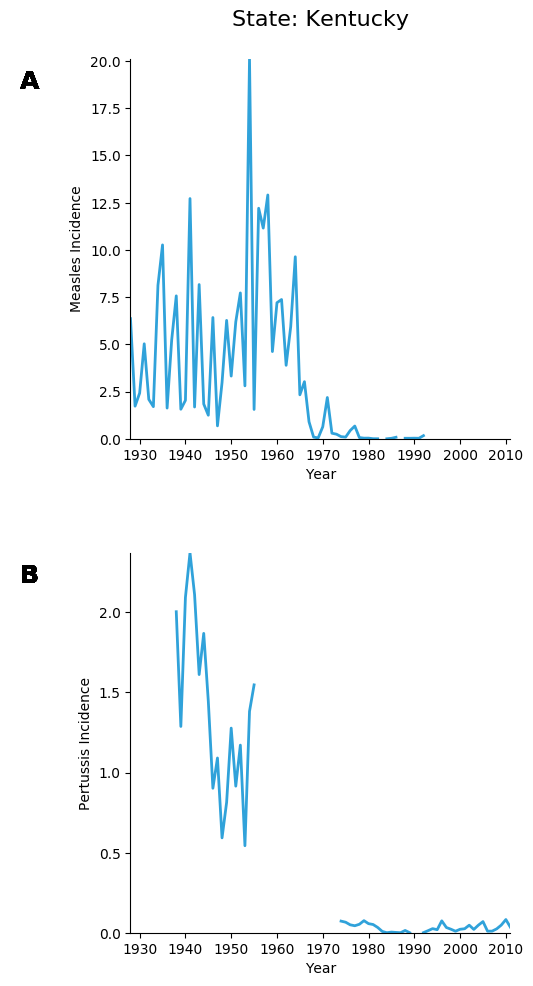
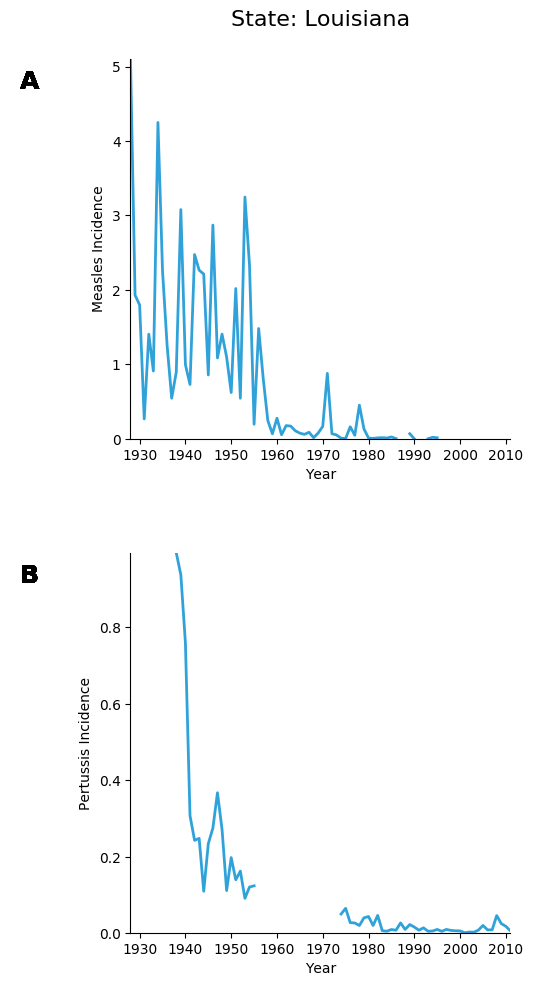
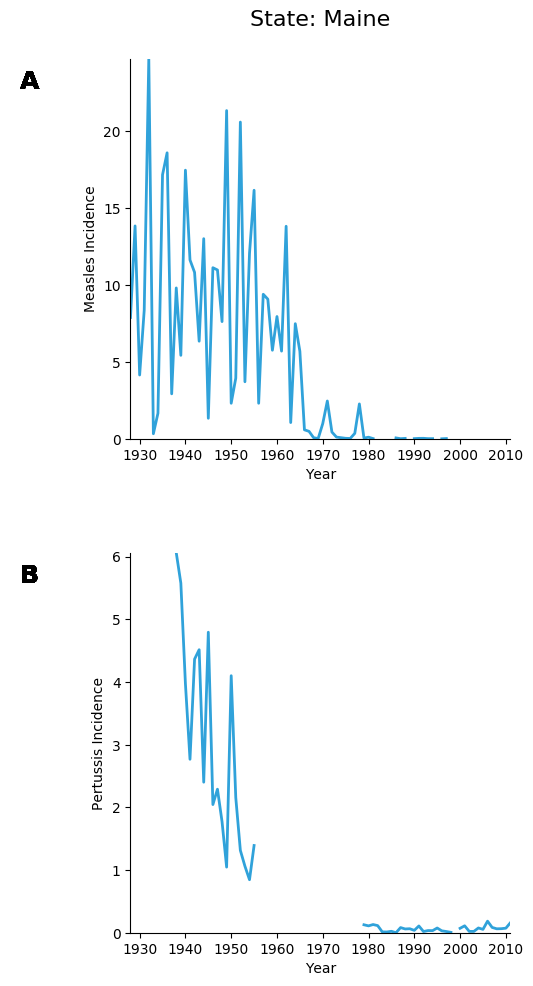
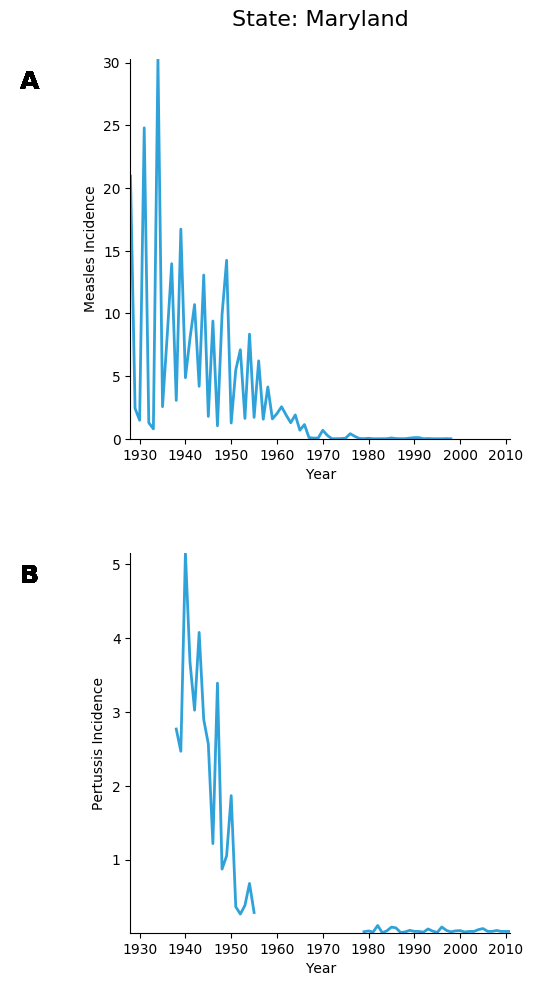
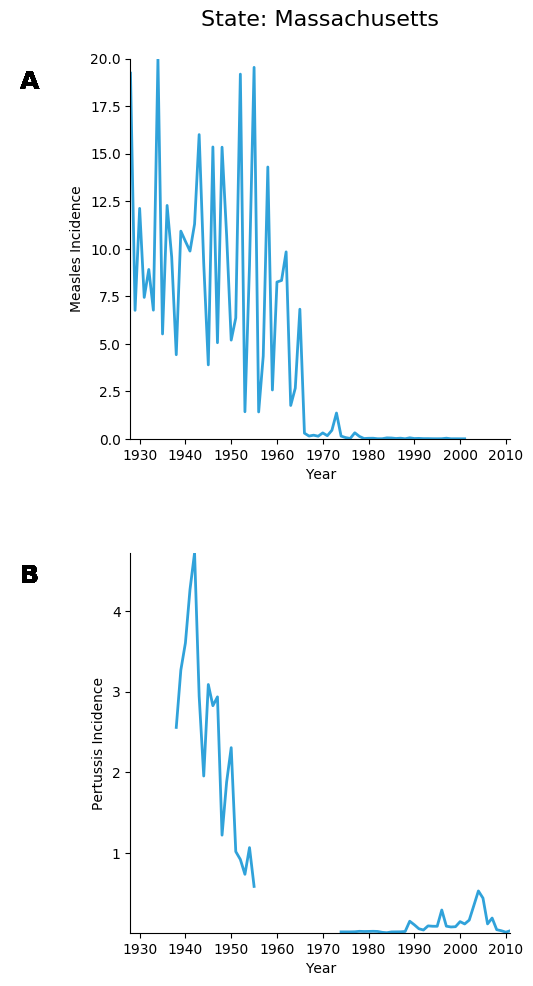
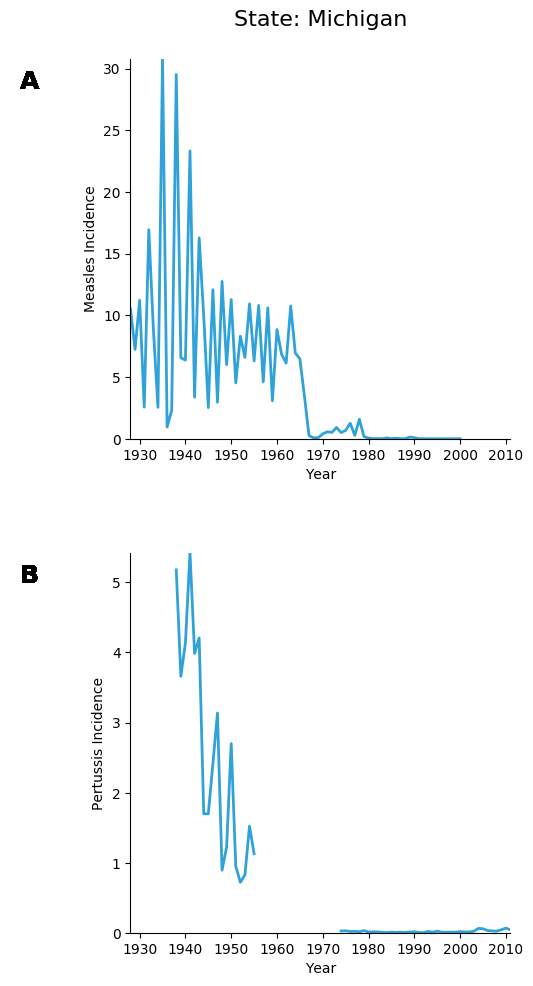
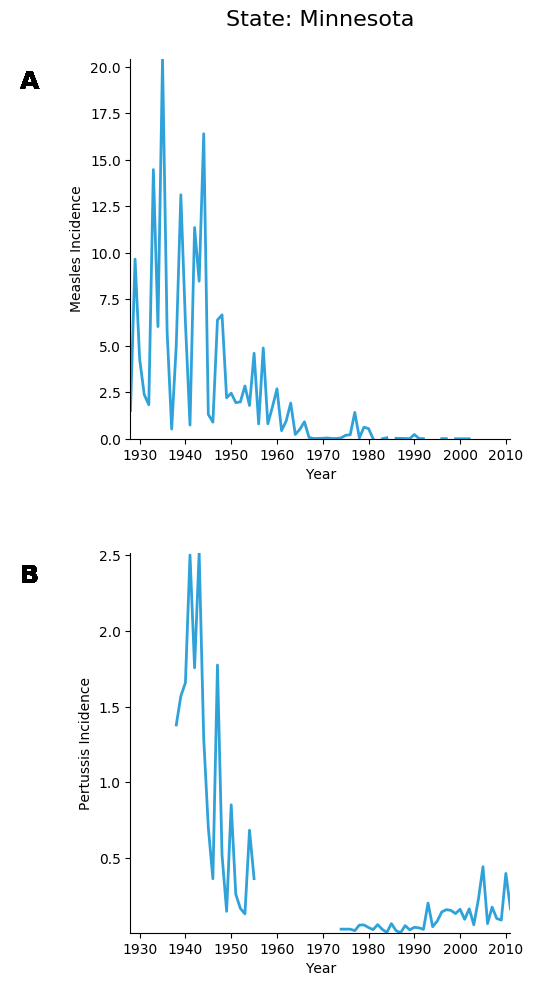
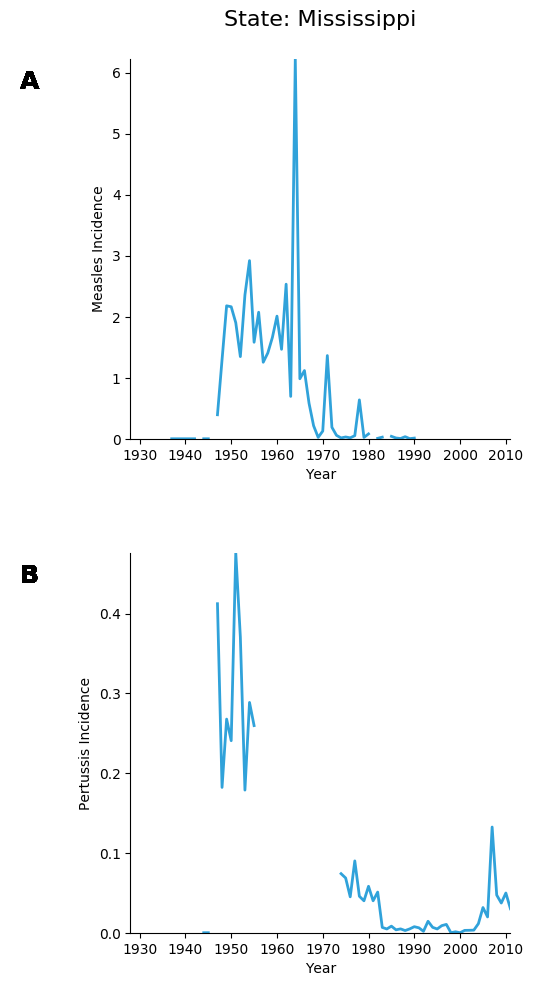
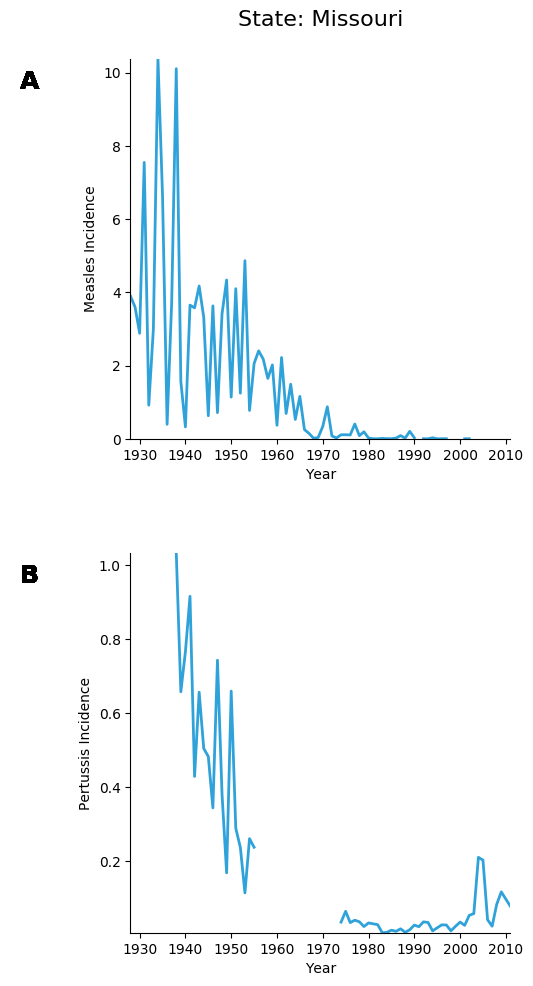
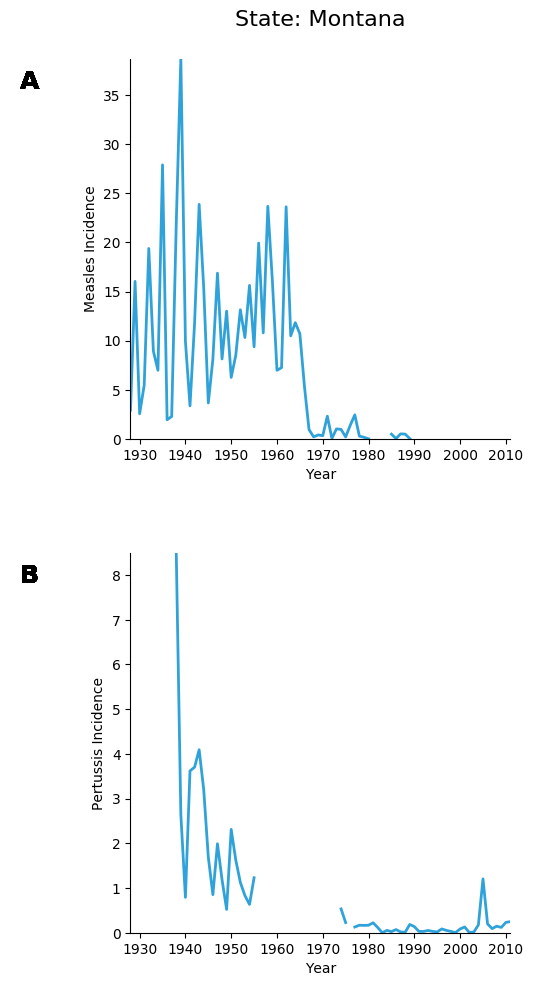
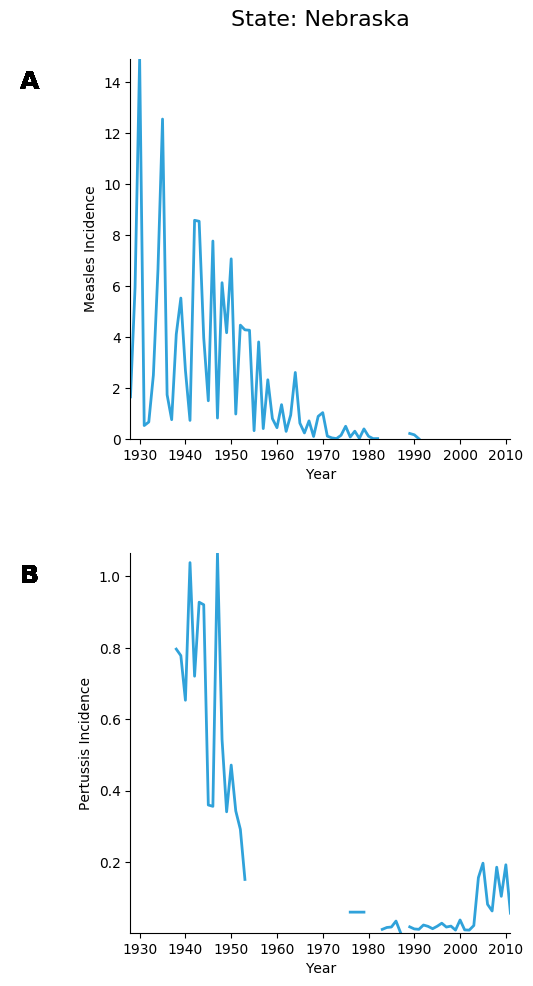
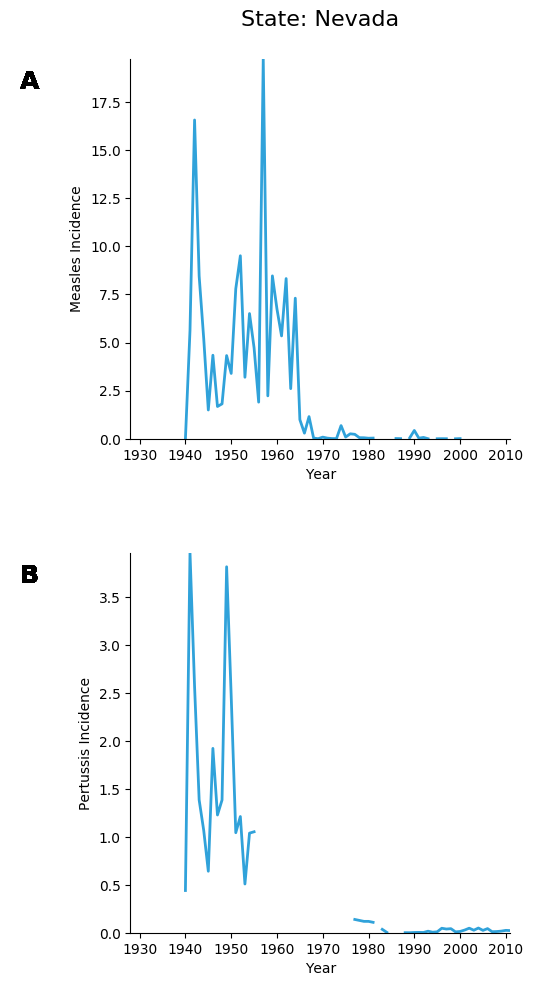
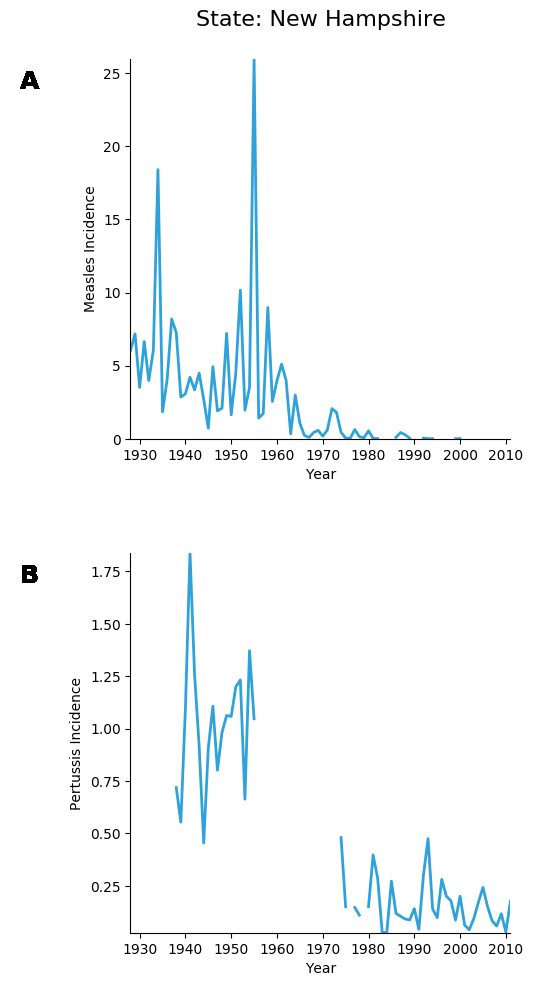
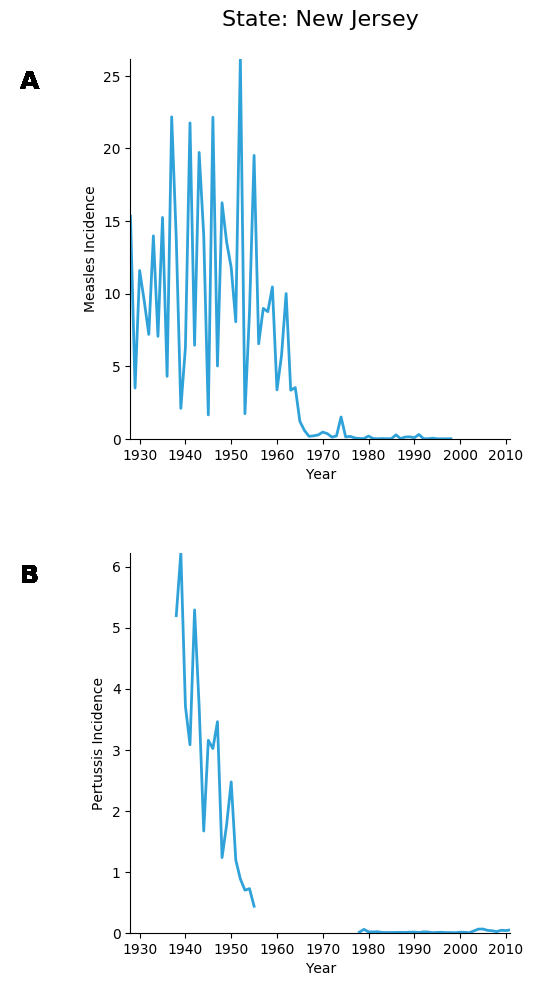
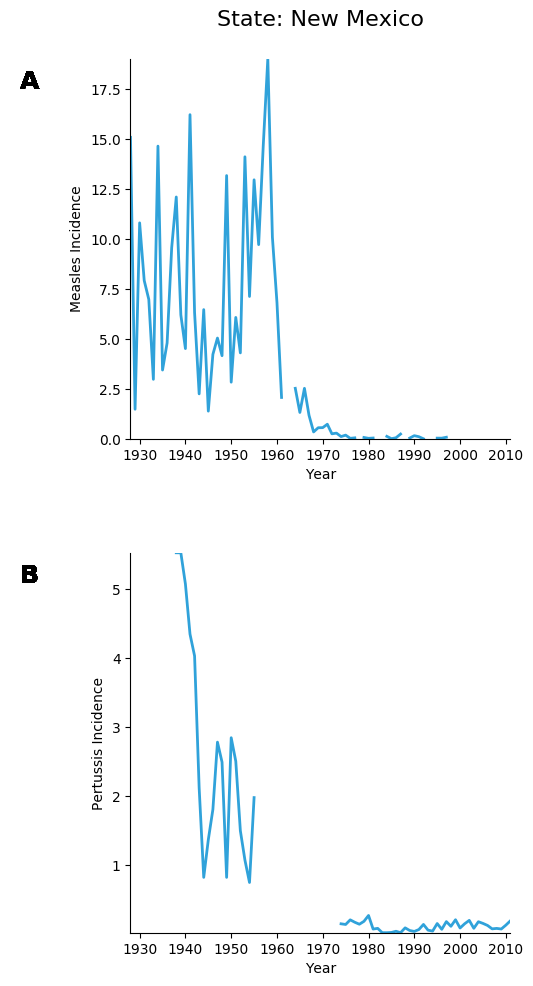
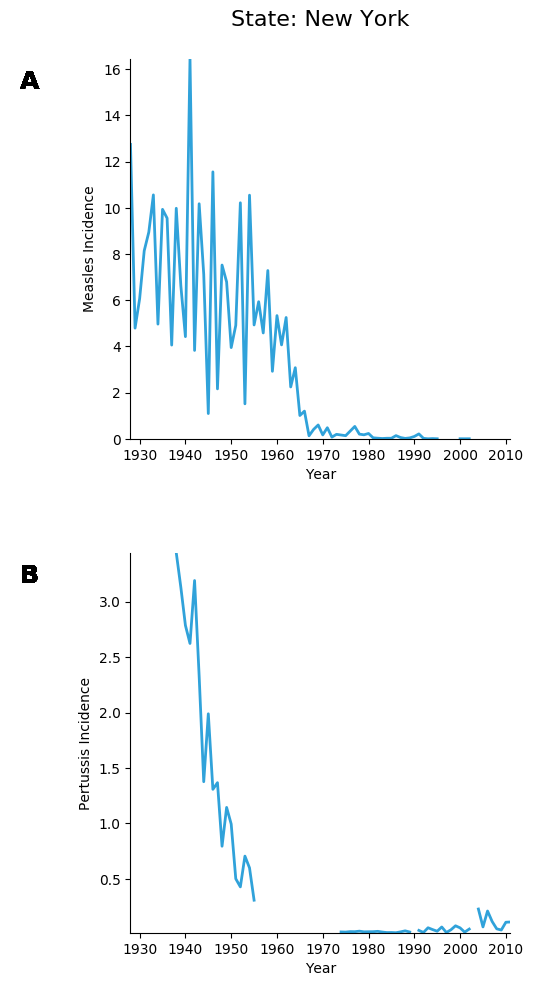
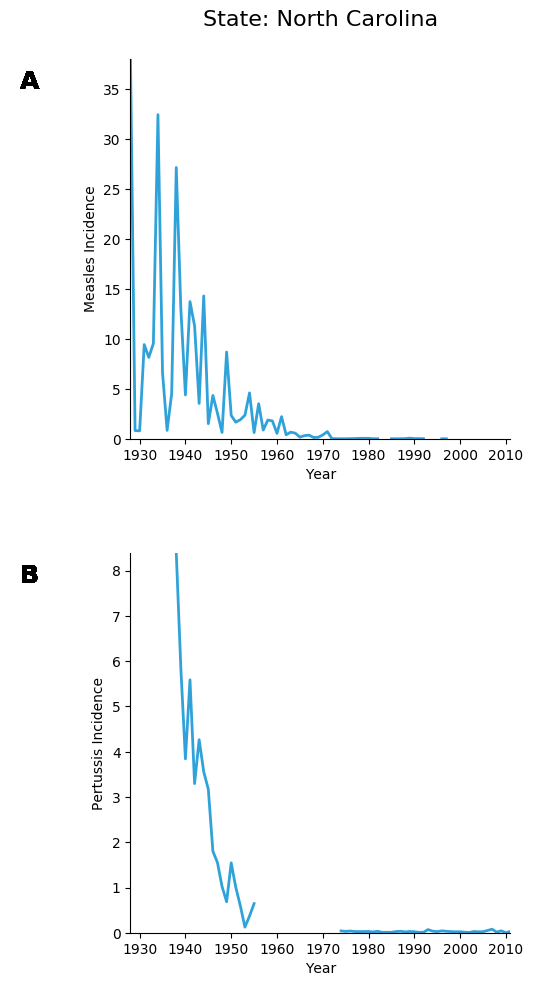
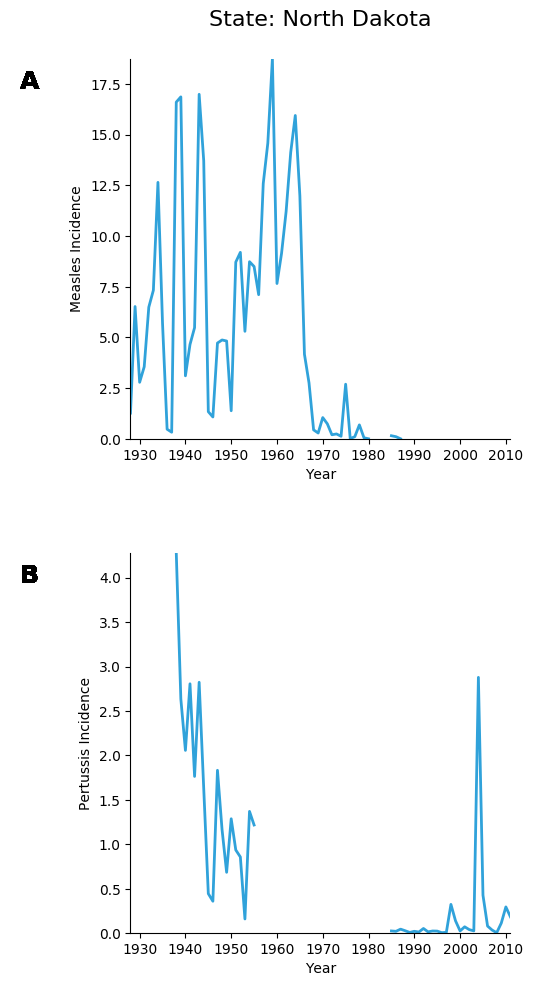
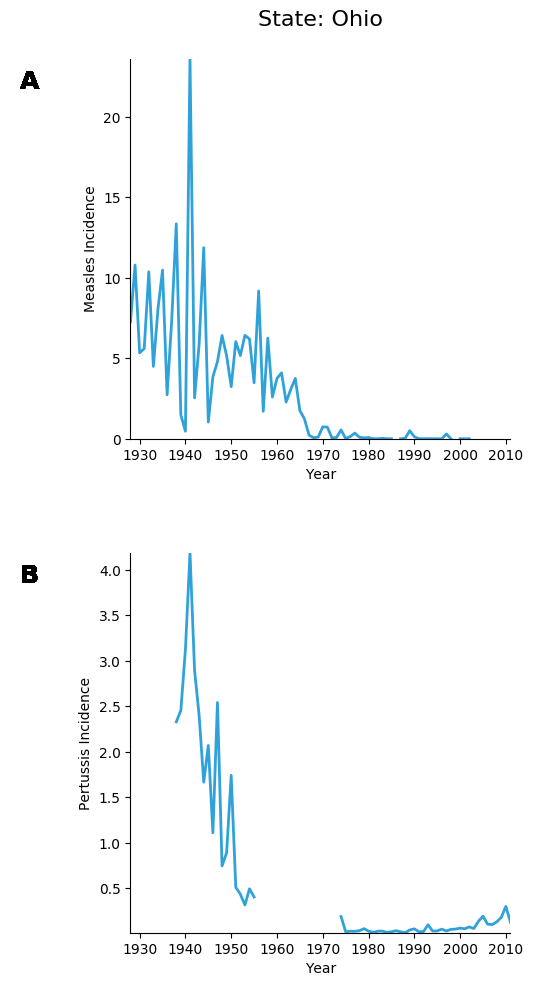
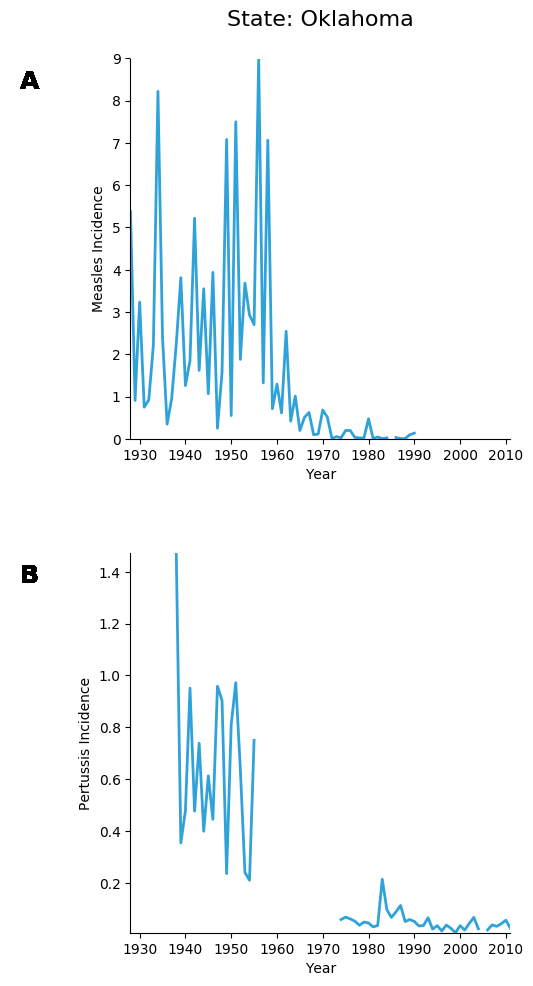
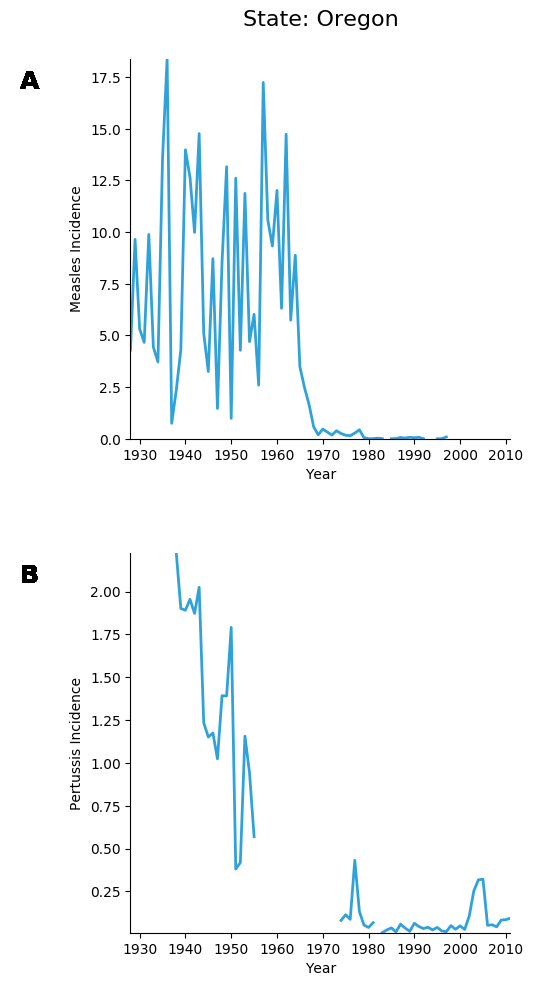
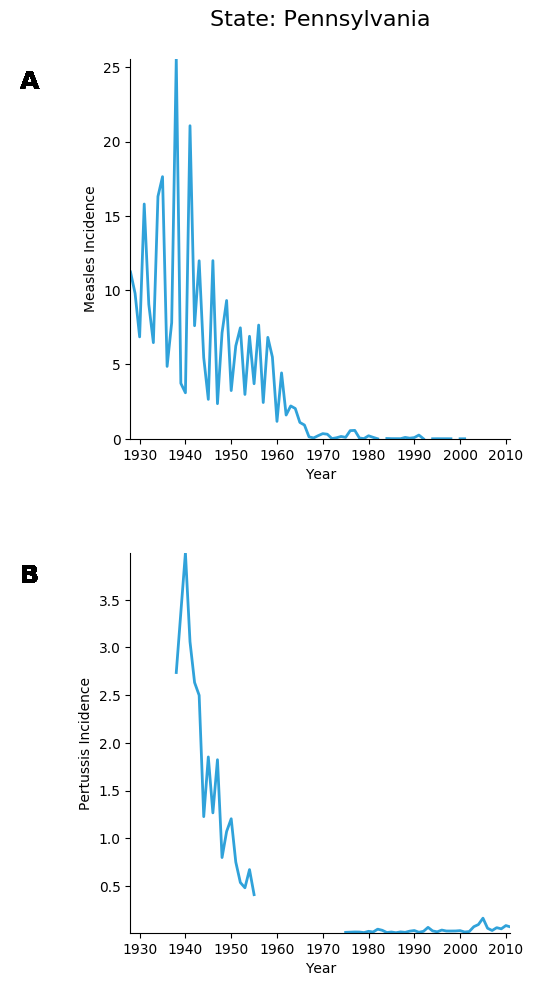
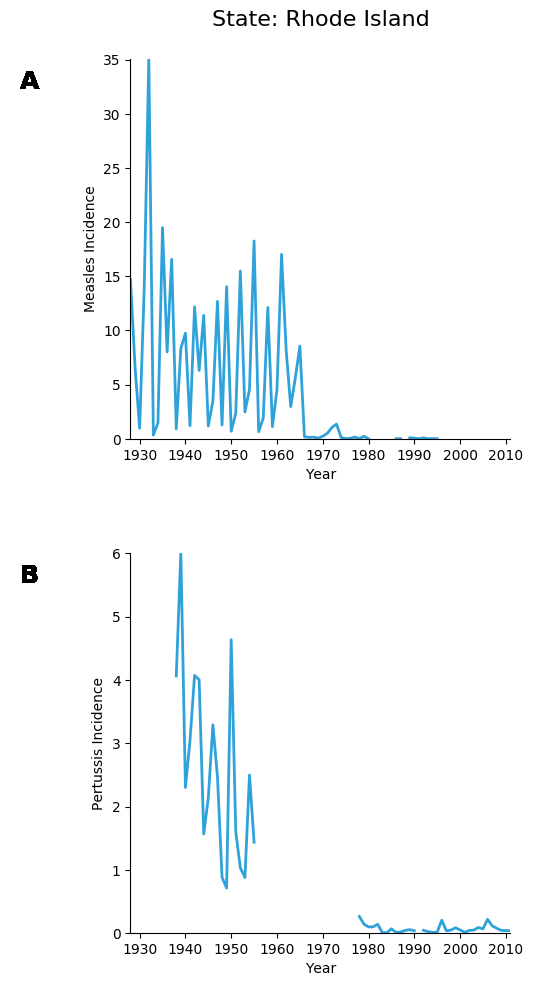
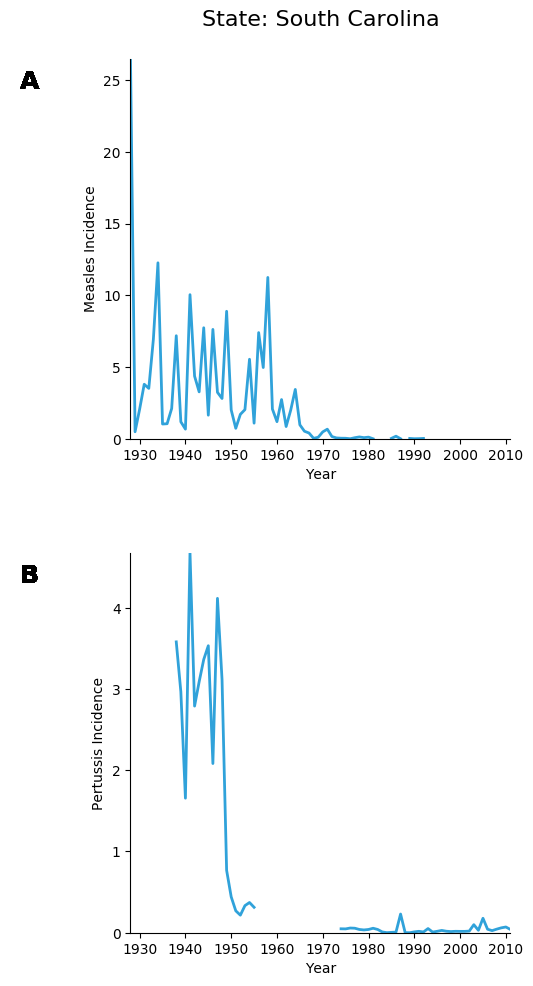
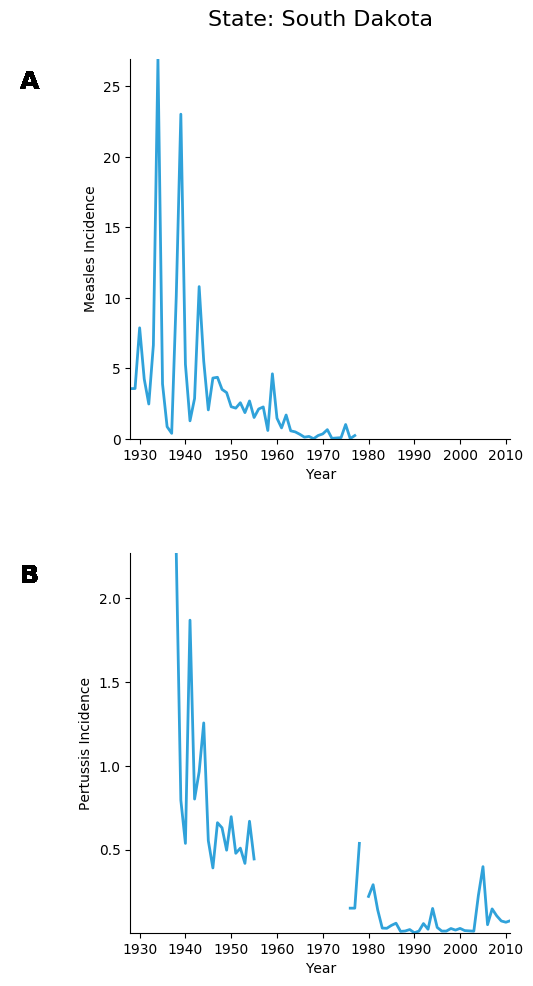
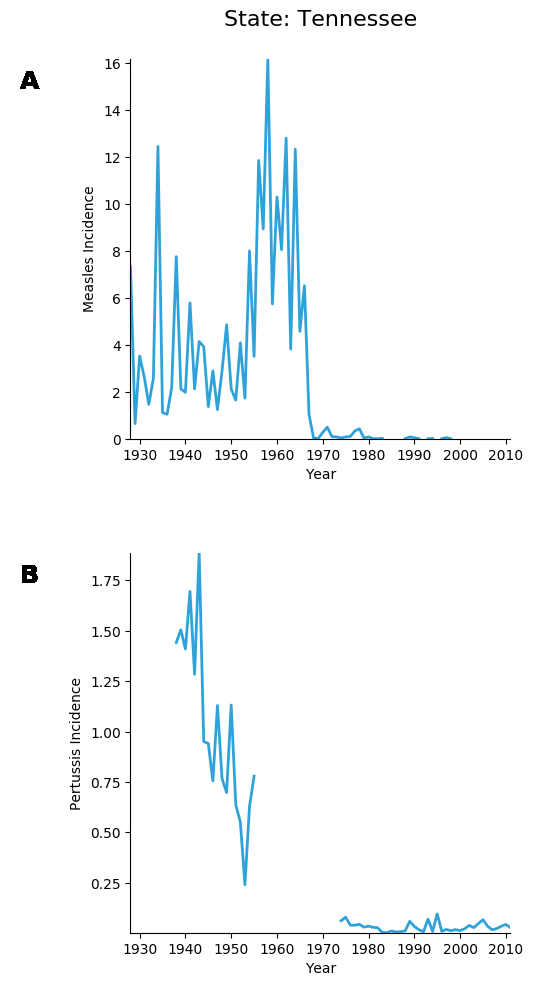
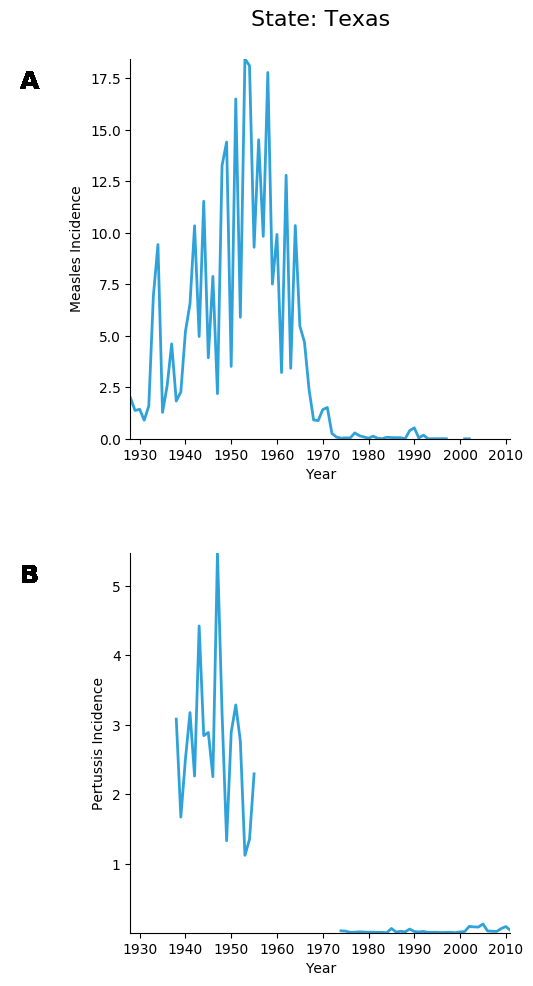
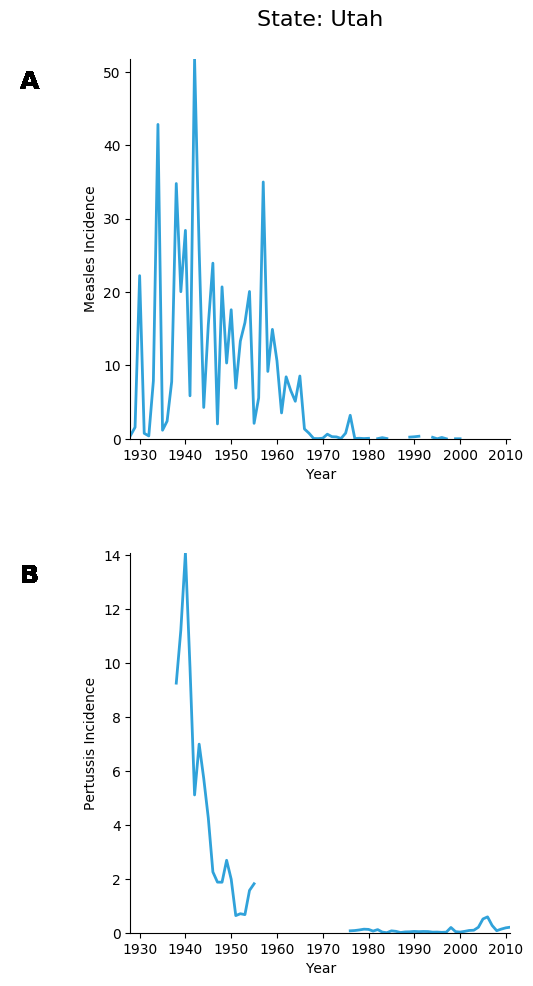
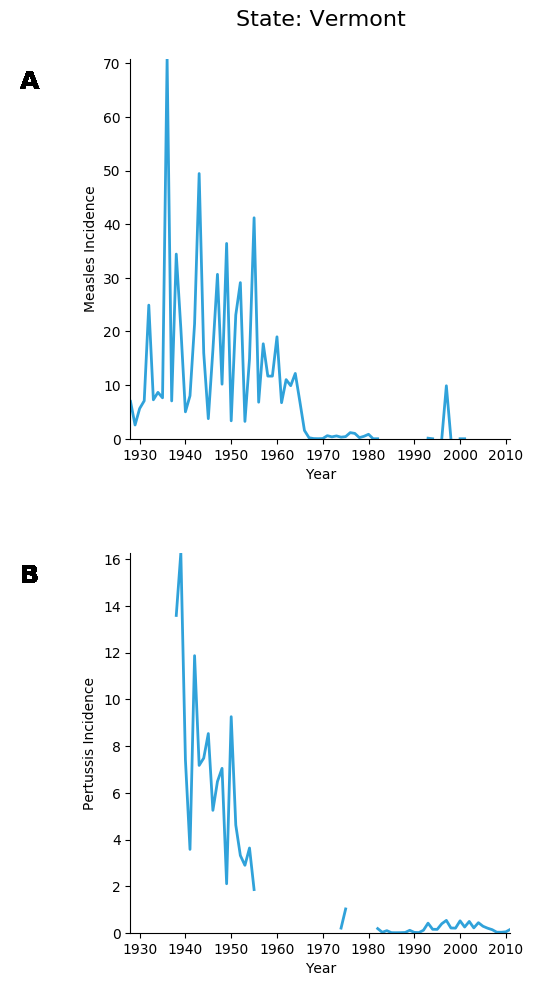
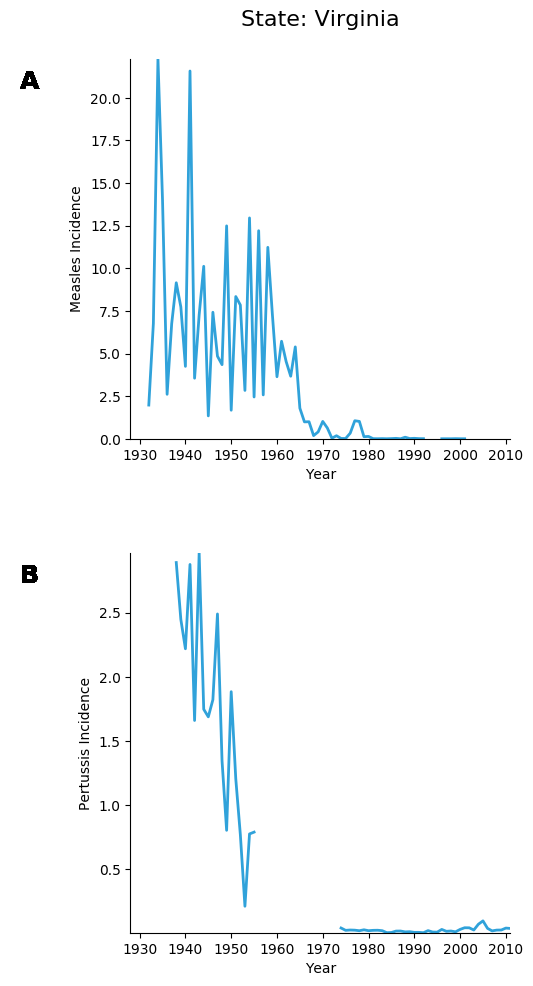
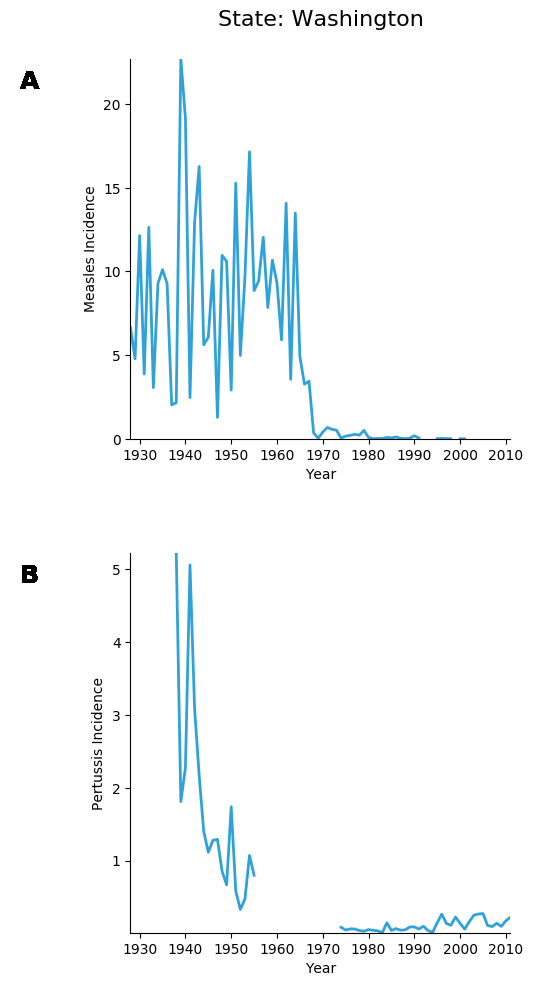
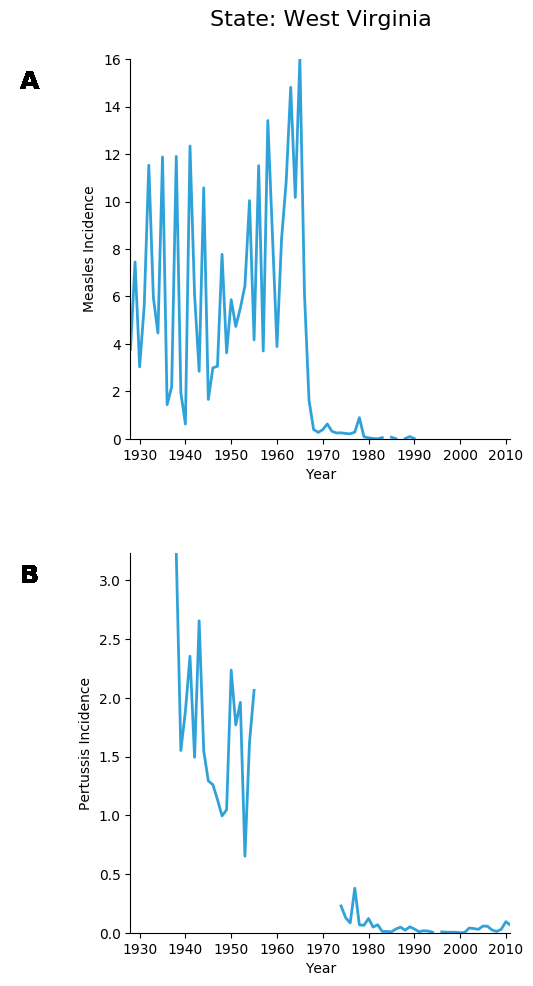
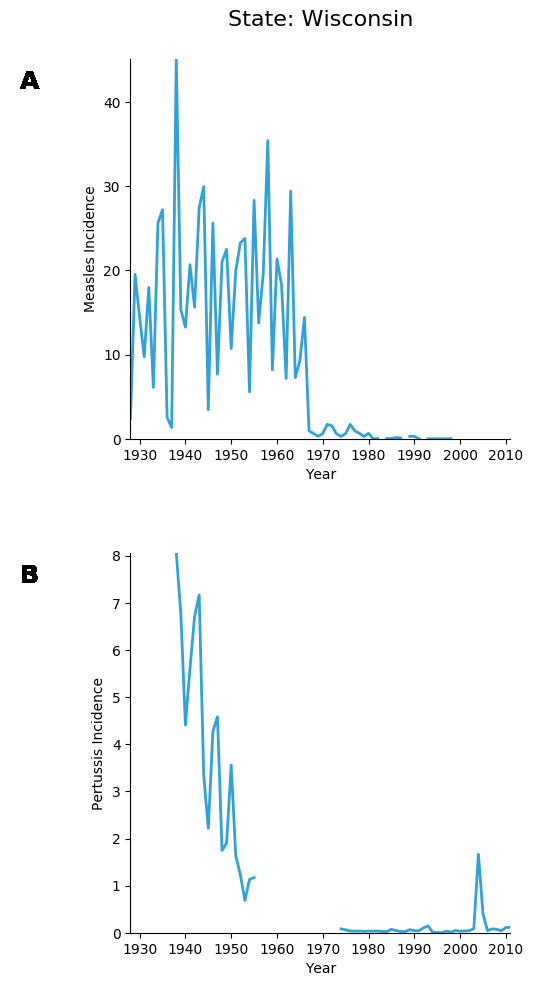
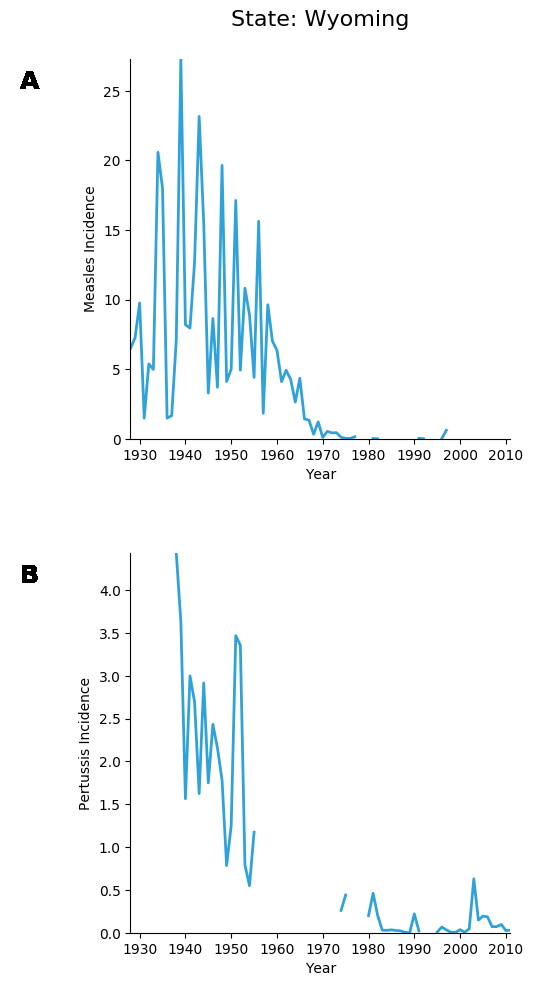

In [23]:
%%opts Curve [width=600, height=250] {+framewise}
(ds.to(hv.Curve, 'Year', 'measles') + ds.to(hv.Curve, 'Year', 'pertussis')).cols(1)